<a href="https://colab.research.google.com/github/joepotts220/DA_M2_project_Joe_Potts/blob/main/DA_M2_project_Joe_Potts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DA M2 Project Notebook

## Title:  Have US hurricanes increased in intensity over time?

## The dataset was downloaded from the NOAA National Centers for Environmental Information (NCEI)

### Import pandas
### Load data into DataFrame:  df_orig
### Create a working copy of the original DataFrame:  df_wk
### Verify load

In [1]:
import pandas as pd

In [2]:
df_orig = pd.read_csv("NOAA_NCEI.csv")

In [3]:
df_orig.head(2)

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN


In [4]:
df_wk = df_orig

In [5]:
df_wk.head(2)


,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN


In [6]:
print(df_wk.shape)

(19066, 14)


In [7]:
df_wk.tail(2)

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
19064,19065,Wanda,2021,11,7,18,40.9,-32.8,other low,NaN,40,1006,90.0,0.0
19065,19066,Wanda,2021,11,8,0,43.2,-29.7,other low,NaN,40,1006,70.0,0.0


### Filter data to show only status = hurricane

In [32]:
df_wk_hur = df_wk[df_wk['status'].isin(['hurricane'])]
print(df_wk_hur.head(10))


    Unnamed: 0      name  year  month  day  hour   lat  long     status  \
44          45   Blanche  1975      7   27     6  35.9 -70.0  hurricane   
45          46   Blanche  1975      7   27    12  36.9 -69.0  hurricane   
46          47   Blanche  1975      7   27    18  37.9 -68.0  hurricane   
47          48   Blanche  1975      7   28     0  39.3 -67.2  hurricane   
48          49   Blanche  1975      7   28     6  41.2 -66.4  hurricane   
73          74  Caroline  1975      8   30     0  23.3 -94.2  hurricane   
74          75  Caroline  1975      8   30     6  23.5 -94.9  hurricane   
75          76  Caroline  1975      8   30    12  23.7 -95.6  hurricane   
76          77  Caroline  1975      8   30    18  23.8 -96.3  hurricane   
77          78  Caroline  1975      8   31     0  24.0 -97.0  hurricane   

    category  wind  pressure  tropicalstorm_force_diameter  \
44       1.0    65       987                           NaN   
45       1.0    70       984                      

## Data cleaning
  - DataFrame shape script
  - Column name replace script
  - Change all column names to upper case
  - Discriptive statistics
      - I was not able to limit this to just WIND and PRESSURE as desired probably due to the column drop script
  - Columns to drop script which caused other subequent scripts to error out when re-ran
  

In [33]:
print(df_wk_hur.shape)

(4684, 14)


In [34]:
df_wk_hur.columns = df_wk_hur.columns.str.replace('UNNAMED: 0', 'INDEX')
df_wk_hur.head(2)

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
44,45,Blanche,1975,7,27,6,35.9,-70.0,hurricane,1.0,65,987,NaN,NaN
45,46,Blanche,1975,7,27,12,36.9,-69.0,hurricane,1.0,70,984,NaN,NaN


In [35]:
df_wk_hur.columns = df_wk_hur.columns.str.upper()
df_wk_hur.head(2)

,UNNAMED: 0,NAME,YEAR,MONTH,DAY,HOUR,LAT,LONG,STATUS,CATEGORY,WIND,PRESSURE,TROPICALSTORM_FORCE_DIAMETER,HURRICANE_FORCE_DIAMETER
44,45,Blanche,1975,7,27,6,35.9,-70.0,hurricane,1.0,65,987,NaN,NaN
45,46,Blanche,1975,7,27,12,36.9,-69.0,hurricane,1.0,70,984,NaN,NaN


In [41]:
pressure_wind_stats = df_wk_hur.describe()
print(pressure_wind_stats)

         UNNAMED: 0         YEAR        MONTH          DAY         HOUR  \
count   4684.000000  4684.000000  4684.000000  4684.000000  4684.000000   
mean    8835.057216  2000.653715     8.953032    15.944278     9.151580   
std     5471.837779    12.698783     0.952611     8.967120     6.739001   
min       45.000000  1975.000000     1.000000     1.000000     0.000000   
25%     4275.750000  1991.000000     8.000000     8.000000     5.000000   
50%     8231.500000  2001.000000     9.000000    16.000000    12.000000   
75%    13338.250000  2011.000000     9.000000    24.000000    18.000000   
max    18981.000000  2021.000000    12.000000    31.000000    23.000000   

               LAT         LONG     CATEGORY         WIND     PRESSURE  \
count  4684.000000  4684.000000  4684.000000  4684.000000  4684.000000   
mean     26.490777   -63.664325     1.898377    86.648164   968.743168   
std       8.090753    16.562560     1.150590    20.707516    18.727738   
min       9.500000   -99.200

In [30]:
# cols_to_drop
# df_wk_hur.drop(cols_to_drop, axis=1, inplace=True)
# df_wk_hur.head(2)

<ipython-input-30-06735c1506bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wk_hur.drop(cols_to_drop, axis=1, inplace=True)


,INDEX,NAME,YEAR,MONTH,LAT,LONG,STATUS,CATEGORY,WIND,PRESSURE
44,45,Blanche,1975,7,35.9,-70.0,hurricane,1.0,65,987
45,46,Blanche,1975,7,36.9,-69.0,hurricane,1.0,70,984


## Correlation value of pressure to wind
### Quick scatter plot verifying the correlation value
### The correlation value was -0.89
### This script was also affected after the drop columns script was ran
### Result:  a very negative correlation--as pressure decreases, wind speed increases, as expected

In [36]:
# shows very negative correlation:  as pressure decreases, wind speed increases
corr_val = (df_wk_hur['pressure'].corr(df_wk_hur['wind']))
corr_val_rnd = corr_val.round(2)
print(corr_val_rnd)


KeyError: 'pressure'

## There are some slight outliers at the extreme low pressures and highest wind speeds. But, due to their importance these rows were not deleted.

<Axes: xlabel='pressure', ylabel='wind'>

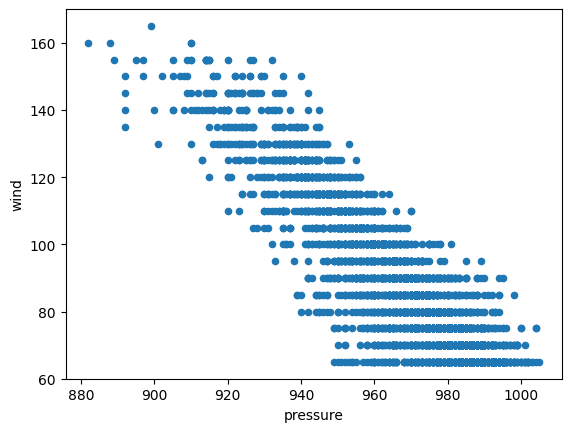

In [12]:
df_wk_hur.plot.scatter(x = 'pressure', y = 'wind',)

In [37]:
df_wk_hur.shape


(4684, 14)

## Grouping hurricane name w/ lowest pressure measurement creating a dataframe w/ one line per hurricane name.

### The groupby script below did work earlier, but after dropping the columns previously I am getting errors on all the scripts.  So, I stopped re-running all subsequent scripts.

In [38]:
# df_wk_hur_grp = df_wk_hur.loc[df_wk_hur.groupby('name')['pressure'].idxmin()]
# print(df_wk_hur_grp.head(10))

KeyError: 'name'

In [15]:
df_wk_hur_grp


,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
4279,4280,AL121991,1991,11,1,18,38.2,-66.5,hurricane,1.0,65,980,NaN,NaN
7552,7553,Alberto,2000,8,12,12,35.9,-55.3,hurricane,3.0,110,950,NaN,NaN
12528,12529,Alex,2010,7,1,2,24.2,-97.7,hurricane,2.0,95,946,300.0,65.0
1701,1702,Alicia,1983,8,18,7,29.1,-95.1,hurricane,3.0,100,962,NaN,NaN
959,960,Allen,1980,8,7,18,21.8,-86.4,hurricane,5.0,165,899,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18138,18139,Teddy,2020,9,18,0,20.4,-54.4,hurricane,4.0,120,945,330.0,90.0
13119,13120,Tomas,2010,10,31,0,13.5,-61.7,hurricane,2.0,85,982,170.0,40.0
10697,10698,Vince,2005,10,9,18,34.1,-18.9,hurricane,1.0,65,988,140.0,30.0
10721,10722,Wilma,2005,10,19,12,17.3,-82.8,hurricane,5.0,160,882,265.0,65.0


In [16]:
df_wk_hur_grp.shape

(173, 14)

In [17]:
print(df_wk_hur_grp.head(10))

       Unnamed: 0      name  year  month  day  hour   lat  long     status  \
4279         4280  AL121991  1991     11    1    18  38.2 -66.5  hurricane   
7552         7553   Alberto  2000      8   12    12  35.9 -55.3  hurricane   
12528       12529      Alex  2010      7    1     2  24.2 -97.7  hurricane   
1701         1702    Alicia  1983      8   18     7  29.1 -95.1  hurricane   
959           960     Allen  1980      8    7    18  21.8 -86.4  hurricane   
5008         5009   Allison  1995      6    4    12  24.7 -86.2  hurricane   
4326         4327    Andrew  1992      8   23    18  25.4 -75.8  hurricane   
379           380     Anita  1977      9    2     6  24.2 -97.1  hurricane   
2711         2712    Arlene  1987      8   22    12  38.0 -43.0  hurricane   
14728       14729    Arthur  2014      7    4     6  35.3 -76.0  hurricane   

       category  wind  pressure  tropicalstorm_force_diameter  \
4279        1.0    65       980                           NaN   
7552       

In [20]:
print(df_wk_hur_grp.shape)

(173, 14)


In [21]:
df_wk_hur.head(20)

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
44,45,Blanche,1975,7,27,6,35.9,-70.0,hurricane,1.0,65,987,NaN,NaN
45,46,Blanche,1975,7,27,12,36.9,-69.0,hurricane,1.0,70,984,NaN,NaN
46,47,Blanche,1975,7,27,18,37.9,-68.0,hurricane,1.0,75,981,NaN,NaN
47,48,Blanche,1975,7,28,0,39.3,-67.2,hurricane,1.0,75,980,NaN,NaN
48,49,Blanche,1975,7,28,6,41.2,-66.4,hurricane,1.0,70,980,NaN,NaN
73,74,Caroline,1975,8,30,0,23.3,-94.2,hurricane,1.0,65,990,NaN,NaN
74,75,Caroline,1975,8,30,6,23.5,-94.9,hurricane,1.0,65,990,NaN,NaN
75,76,Caroline,1975,8,30,12,23.7,-95.6,hurricane,1.0,65,989,NaN,NaN
76,77,Caroline,1975,8,30,18,23.8,-96.3,hurricane,1.0,70,987,NaN,NaN
77,78,Caroline,1975,8,31,0,24.0,-97.0,hurricane,3.0,100,973,NaN,NaN


In [22]:
df_wk_hur_grp.sort_values(['year', 'month'], inplace=True)
df_wk_hur_grp.head(20)

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
47,48,Blanche,1975,7,28,0,39.3,-67.2,hurricane,1.0,75,980,NaN,NaN
78,79,Caroline,1975,8,31,6,24.1,-97.5,hurricane,3.0,100,963,NaN,NaN
103,104,Doris,1975,9,2,6,36.4,-44.5,hurricane,2.0,95,965,NaN,NaN
153,154,Eloise,1975,9,23,12,30.2,-86.3,hurricane,3.0,110,955,NaN,NaN
175,176,Faye,1975,9,28,18,42.3,-52.0,hurricane,1.0,75,977,NaN,NaN
217,218,Gladys,1975,10,2,12,35.3,-69.8,hurricane,4.0,120,939,NaN,NaN
249,250,Belle,1976,8,9,0,30.9,-75.3,hurricane,3.0,105,957,NaN,NaN
275,276,Candice,1976,8,22,18,41.3,-56.4,hurricane,1.0,80,964,NaN,NaN
298,299,Emmy,1976,8,29,12,35.0,-56.8,hurricane,2.0,90,974,NaN,NaN
360,361,Holly,1976,10,24,12,24.9,-58.1,hurricane,1.0,65,990,NaN,NaN


## Scatter plot of the 'pressure' measurments over time.
  - Note that the y axis is reversed to bring the most powerfull storms to the top of the plot
  - The line plot of this data was not useable due to the extremes of the pressure measurements for the different hurricanes
  - I attemped to create data collection cursors to increase the usefullness of the plot, but I was unable to install mplcursors after research and several attempts


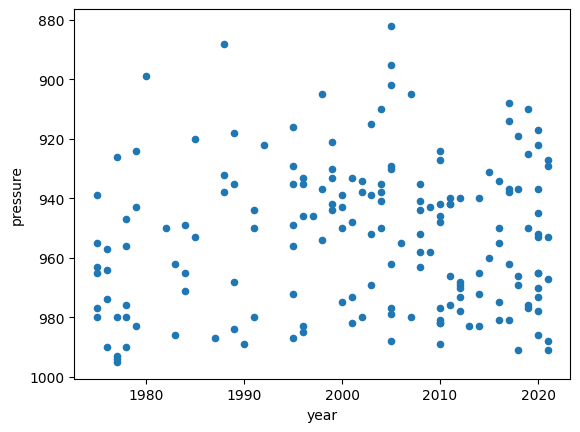

In [25]:
import matplotlib.pyplot as plt
# import numpy as np
# import mplcursors

grp_plot = df_wk_hur_grp.plot.scatter(x = 'year', y = 'pressure',)
grp_plot.invert_yaxis()
# # cursor.connect("add", lambda sel: sel.annotation.set_text(df_wk_hur_grp.loc[sel.target.index, 'name']))
plt.show()

## Findings
  - The data shows that there were 6 hurricanes before 2010 that showed lower pressure measuremnts and higher wind speeds than any hurricanes in the years following 2010.
## Supporting Data
  - The correlation value of -0.89 shows a strong negative relationship between barametric pressure of the hurricane and wind speed.  The top 6 hurricanes in the scatter plot above have pressure values from ~915 to ~875.  No hurricane after 2010 have those very low pressure measurements.
## Summary
  - From this analysis, the title question:  "Have US hurricanes increased in intensity over time?" shows the intensity of hurricanes is not increasing over the time period of this dataset.
## Recomendations
  - Considering the conclusions from this analysis, more research should be done considering other aspects of hurricane intensity such as water tempature, CO2 levels, and the cost of hurricane recovery.